<a href="https://colab.research.google.com/github/sobirjonhabibullaev/True_vs_Fake_news_ML-Project/blob/main/Fake_and_Real_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pydrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [4]:
id = "1A_r5euUZdaiOjtMVUhp3nv1wxWKf12HR" 

In [5]:
imported = drive.CreateFile({'id': id})
imported.GetContentFile('Fake.csv')

In [6]:
id = "1hCMbKzn3HHAd_K4DrXXmYKMDWAMzkVg6"

In [7]:
imported = drive.CreateFile({'id': id})
imported.GetContentFile('True.csv')

In [8]:
import pandas as pd

In [9]:
df_true_news = pd.read_csv('True.csv')

In [10]:
df_fake_news = pd.read_csv('Fake.csv')

In [11]:
df_fake_news.head(20)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [12]:
df_fake_news.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [13]:
df_true_news.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [14]:
# Find Missing Data if any at all
def find_missing_vals(data):
  total = len(data)
  for column in data.columns:
    if data[column].isna().sum() != 0:
      print("{} has {:,} ({:.2}%) missing values.".format(column, data[column].isna().sum(), (data[column].isna().sum()/total)*100))
    else:
      print("{} has no any missing value.".format(column))
  print("\nMissing Value Summary\n{}".format("-"*35))
  print("\ndf_db\n{}".format("-"*15))
  print(data.isnull().sum(axis = 0))


In [15]:
def remove_duplicates(data):
  print("\nCleaning Summary\n{}".format("-"*35))
  size_before = len(data)
  data.drop_duplicates(subset=None, keep="first", inplace=True)
  size_after = len(data)
  print("... removed {} duplicate rows in db data".format(size_before-size_after))

In [16]:
find_missing_vals(df_fake_news)

title has no any missing value.
text has no any missing value.
subject has no any missing value.
date has no any missing value.

Missing Value Summary
-----------------------------------

df_db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [17]:
remove_duplicates(df_fake_news)


Cleaning Summary
-----------------------------------
... removed 3 duplicate rows in db data


In [18]:
remove_duplicates(df_true_news)


Cleaning Summary
-----------------------------------
... removed 206 duplicate rows in db data


In [19]:
df_merged = pd.merge(df_fake_news, df_true_news, how='outer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


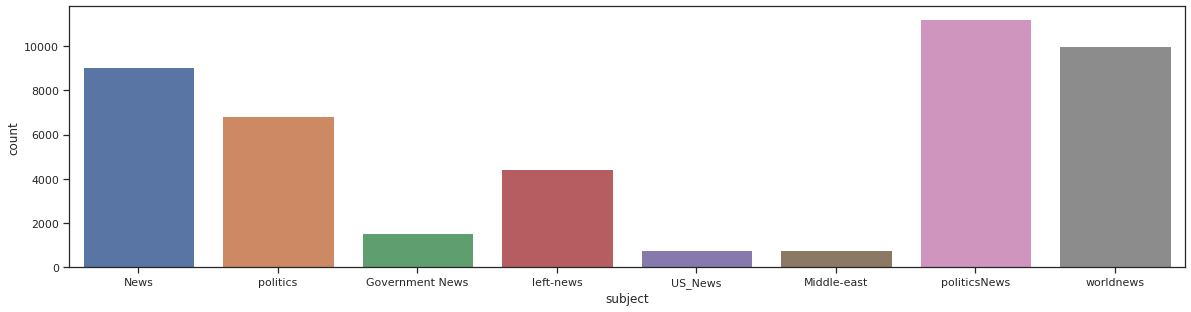

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

fig_dims = (20, 4.8)
fig, ax =plt.subplots(figsize=fig_dims)
sns.countplot(df_merged['subject'], ax=ax, data=df_merged)

In [21]:
df_fake_news['label'] = 0
df_true_news['label'] = 1

In [22]:
df_train = pd.merge(df_fake_news, df_true_news, how='outer')

In [23]:
!pip install sklearn

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

### Remove stopwords and punctuations

In [25]:
import string

In [26]:
from nltk.corpus import stopwords

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def text_process(text):
  no_punctuation = [char for char in text if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

#### Model Creation and Training

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_train['title'], df_train['label'], test_size=0.2, random_state=42)

In [31]:
# Deeplearning Multi-perceptron neural network binary classifier

from sklearn.neural_network import MLPClassifier

In [35]:
from sklearn.pipeline import Pipeline

news_classifier = Pipeline([
                            ('vectorizer', CountVectorizer(analyzer=text_process)),
                            ('tfidf', TfidfTransformer()),
                            ('classifier', MLPClassifier(solver='adam', activation='tanh',
                                                         random_state=1, max_iter=200, early_stopping=True))
])

In [36]:
news_classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x7f8adc97a8c0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_ite

**Model Evaluation**

In [38]:
predicted = news_classifier.predict(X_test)

In [41]:
#############################
#________Testing GPU________#
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

############################

Tue Oct  5 16:22:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4731
           1       1.00      1.00      1.00      4207

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



**Saving and Downloading your model**

In [42]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [62]:
joblib.dump(news_classifier, 'Model.pkl')

['Model.pkl']

[Python API](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=0ENMqxq25szn)

In [58]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [55]:
from googleapiclient.http import MediaFileUpload

In [63]:
file_metadata = {
  'name': 'Model.pkl',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('Model.pkl', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1Eeko1-Hc-iE728lYTnbUh-vEbrEdSKNR


**Model Deployment**

In [70]:
news_title = ["Tesla now is broke"]
prediction = news_classifier.predict(news_title)
print(prediction)

[1]


In [71]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl